### Importing Required Libraries

In [108]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

os.getcwd()

'C:\\Users\\306student\\Desktop\\mini project'

### Data Exploration and Cleaning

In [109]:
df = pd.read_csv('C:/Users/306student/Desktop/mini project/Airplane/train.csv')

In [110]:
df2 = pd.read_csv('C:/Users/306student/Desktop/mini project/Airplane/test.csv')
frames = [df, df2]
df = pd.concat(frames)

In [111]:
a = pd.get_dummies(df['Gender'])
b = pd.get_dummies(df['Customer Type'])
c = pd.get_dummies(df['Type of Travel'])
d = pd.get_dummies(df['Class'])

In [112]:
frames = [df, a, b, c, d]

df = pd.concat(frames, axis = 1)
df.head()

df = df.drop(columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Arrival Delay in Minutes'])

In [37]:
df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0,1], inplace = True)

## where 'neutral or dissatisfied' is 0 and 'satisfied' is 1

### Organizing Data for Training

In [38]:
y = df.satisfaction.values

x_data = df.drop(columns = ['Unnamed: 0', 'id', 'satisfaction'])
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


C:\Users\306student\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\306student\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

### Building and Training Model

In [62]:
inputs = tf.keras.Input(shape=(26,))

In [95]:
func = 'relu'
initializer = 'he_normal'
hidden1 = tf.keras.layers.Dense(256, activation = func, kernel_initializer = initializer)(inputs)
hidden2 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden1)
hidden3 = tf.keras.layers.Dropout(0.2)(hidden2)
hidden4 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden3)
hidden5 = tf.keras.layers.Dropout(0.2)(hidden4)
hidden6 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden5)
hidden7 = tf.keras.layers.Dropout(0.2)(hidden6)
hidden8 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden7)
hidden9 = tf.keras.layers.Dropout(0.2)(hidden8)
hidden10 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden9)
hidden11 = tf.keras.layers.Dropout(0.2)(hidden10)
hidden12 = tf.keras.layers.Dense(512, activation = func, kernel_initializer = initializer)(hidden11)
hidden13 = tf.keras.layers.Dropout(0.2)(hidden12)
hidden14 = tf.keras.layers.Dense(256, activation = func, kernel_initializer = initializer)(hidden13)

In [96]:
output = tf.keras.layers.Dense(1)(hidden14)

In [97]:
model = tf.keras.models.Model(inputs=inputs, outputs=output)

In [98]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_80 (Dense)            (None, 256)               6912      
                                                                 
 dense_81 (Dense)            (None, 512)               131584    
                                                                 
 dropout_54 (Dropout)        (None, 512)               0         
                                                                 
 dense_82 (Dense)            (None, 512)               262656    
                                                                 
 dropout_55 (Dropout)        (None, 512)               0         
                                                                 
 dense_83 (Dense)            (None, 512)               2626

In [99]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [100]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
2598/2598 [==============================] - 53s 20ms/step - loss: 0.2103 - accuracy: 0.9153 - val_loss: 0.1428 - val_accuracy: 0.9353
Epoch 2/10
2598/2598 [==============================] - 49s 19ms/step - loss: 0.1386 - accuracy: 0.9411 - val_loss: 0.1206 - val_accuracy: 0.9481
Epoch 3/10
2598/2598 [==============================] - 45s 17ms/step - loss: 0.1269 - accuracy: 0.9453 - val_loss: 0.1242 - val_accuracy: 0.9324
Epoch 4/10
2598/2598 [==============================] - 44s 17ms/step - loss: 0.1229 - accuracy: 0.9468 - val_loss: 0.1095 - val_accuracy: 0.9535
Epoch 5/10
2598/2598 [==============================] - 43s 16ms/step - loss: 0.1167 - accuracy: 0.9490 - val_loss: 0.1044 - val_accuracy: 0.9538
Epoch 6/10
2598/2598 [==============================] - 46s 18ms/step - loss: 0.1120 - accuracy: 0.9515 - val_loss: 0.1084 - val_accuracy: 0.9501
Epoch 7/10
2598/2598 [==============================] - 48s 19ms/step - loss: 0.1087 - accuracy: 0.9518 - val_loss: 0.1117 -

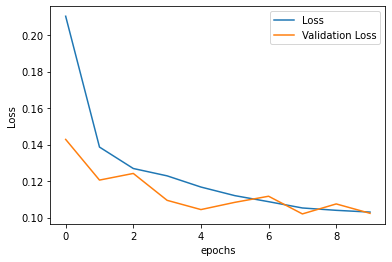

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

### Test Model

In [113]:
model.evaluate(x_test, y_test)

812/812 [==============================] - 3s 4ms/step - loss: 0.1023 - accuracy: 0.9517


[0.10234981030225754, 0.951724648475647]